In [116]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [117]:
df = pd.read_csv('D:/dataSets/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [118]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [120]:
# df.dropna() 
# df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
# df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
df.iloc[: , 9:11] = imputer.fit_transform(df.iloc[: , 9:11].values)

In [121]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### 1. Analyzing columns

In [122]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [123]:
for column in df.columns:
    print(column , ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 17959


In [124]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [125]:
for column in df.columns:
    print(column , ":" ,df[column].unique())

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 : [ 9.84214403  6.         14.          2.          8.         15.
 16.         11.          5.          3.          4.         12.
  9.         10.         17.         13.          7.         18.        ]
Product_Category_3 : [12.66984015 14.         17.          5.          4.         16.
 15.          8.          9.         13.          6.         12.
  3.         18.         11.         10.        ]
Purchase : [ 8370 15200  1422 ... 14539 11120 18426]


In [126]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

### 2. Analyzing Gender

In [127]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: ylabel='Ratio'>

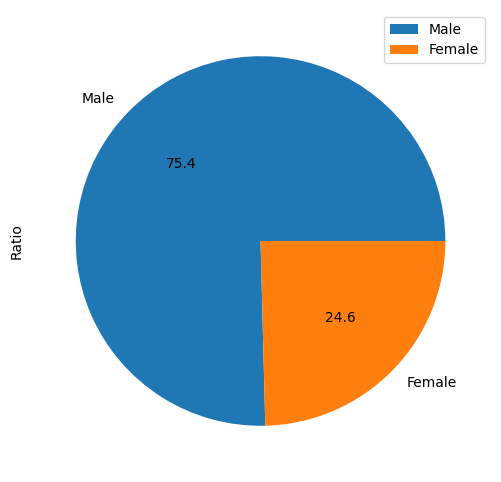

In [128]:
# find total number of male and female buyers 
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]} , index = ['Male','Female'])

data.plot.pie(y ='Ratio' , figsize=(6,6), autopct = '%.1f')

<Axes: title={'center': 'Gender Ratio'}>

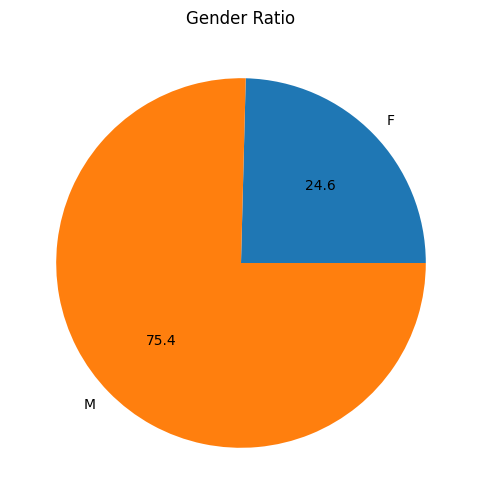

In [129]:
 # using groupby method 
df.groupby('Gender').size().plot(kind = 'pie',
                                 autopct = '%.1f',
                                 title = 'Gender Ratio',
                                  figsize=(6,6) )

<Axes: xlabel='Gender'>

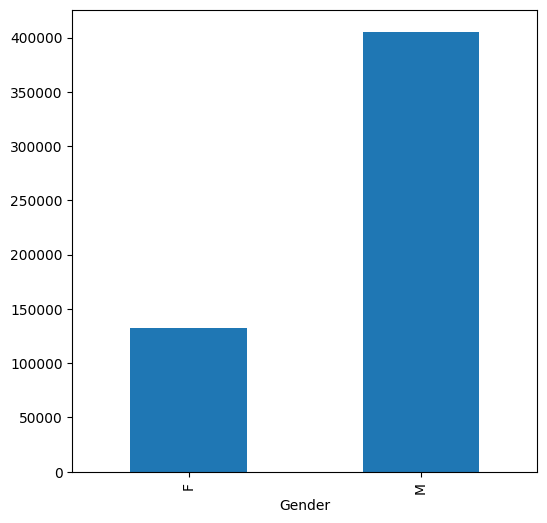

In [130]:
df.groupby('Gender').size().plot(kind = 'bar',
                                  figsize=(6,6) )

<Axes: ylabel='Purchase'>

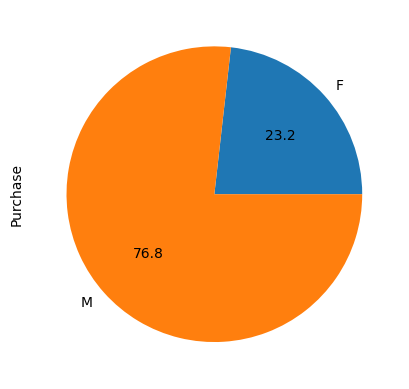

In [131]:
# money spend by male and female
df.groupby('Gender')['Purchase'].sum().plot(kind='pie', autopct='%0.1f')

<Axes: ylabel='Purchase'>

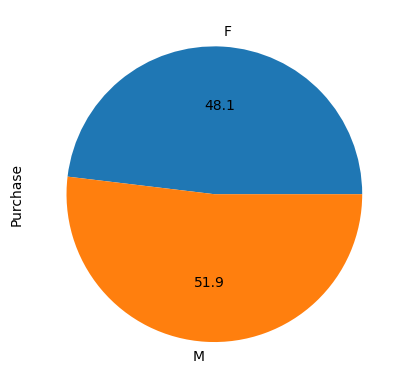

In [132]:
# average per product , what amount is spend by male and female
df.groupby('Gender')['Purchase'].mean().plot(kind='pie', autopct='%0.1f')

### 3.Analysing Age & Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

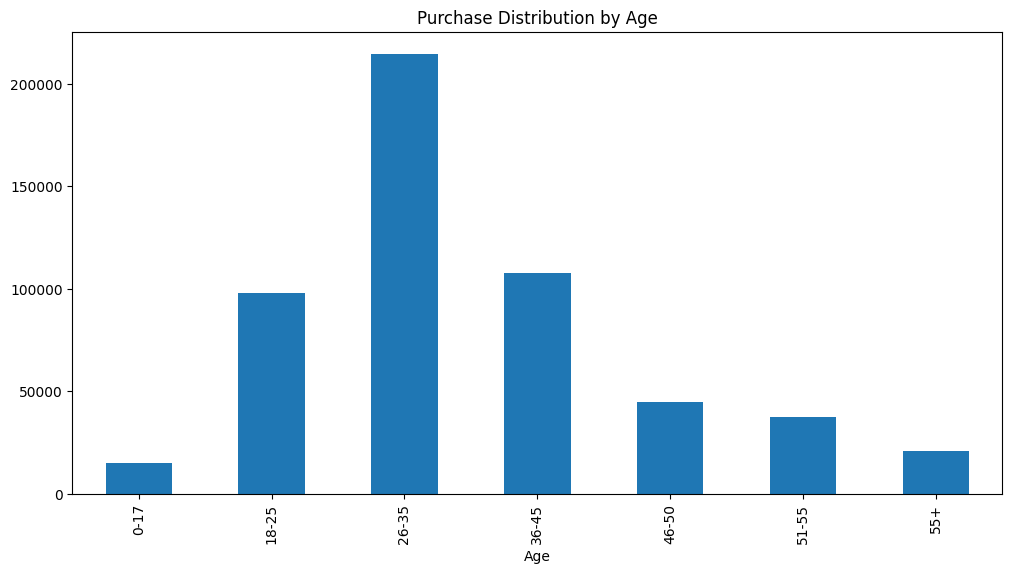

In [142]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6) , title = 'Purchase Distribution by Age')

In [143]:
# number of products purchased by different age group
for i in  df['Age'].unique():
     print(i ,'\t:' ,len(df[df['Age'] == i ]))

0-17 	: 14707
55+ 	: 20903
26-35 	: 214690
46-50 	: 44526
51-55 	: 37618
36-45 	: 107499
18-25 	: 97634


In [144]:
# total products that are purchased
df[df['Age'] == i ]['Product_ID']

70        P00366542
71        P00190742
72        P00151842
73        P00112642
74        P00118442
            ...    
537566    P00048742
537567    P00157542
537568    P00250642
537569    P00023142
537570    P00162442
Name: Product_ID, Length: 97634, dtype: object

In [145]:
# # unique products that are purchased
df[df['Age'] == i ]['Product_ID'].nunique()

3213

In [141]:
# number of unique products purchased by different age group
for i in  df['Age'].unique():
     print(i ,'\t:' ,df[df['Age'] == i ]['Product_ID'].nunique())

0-17 	: 2300
55+ 	: 2573
26-35 	: 3419
46-50 	: 3099
51-55 	: 2877
36-45 	: 3318
18-25 	: 3213


In [140]:
# create DataFrame for ploting graphs and charts
lst = []
for i in  df['Age'].unique():
     lst.append([i ,df[df['Age'] == i ]['Product_ID'].nunique()])

data = pd.DataFrame(lst , columns =['Age','Products'])

In [139]:
data

,Ratio
Male,405380
Female,132197


<Axes: >

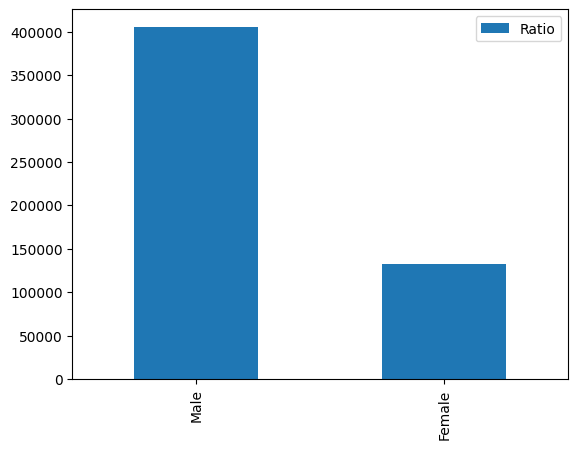

In [138]:
data.plot(kind = 'bar')

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

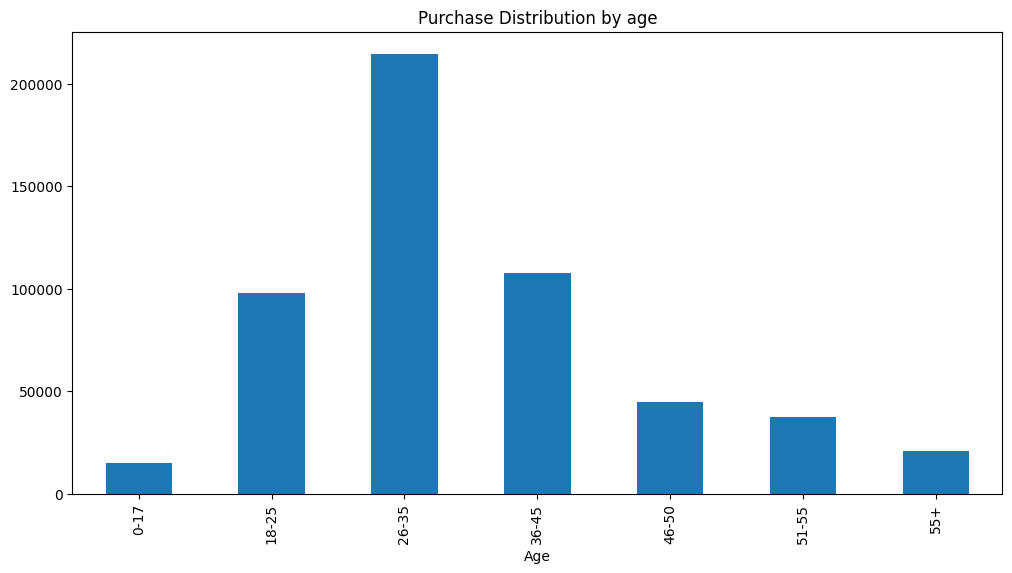

In [137]:
df.groupby('Age').size().plot(kind = 'bar' , figsize = (12,6) , title = 'Purchase Distribution by age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

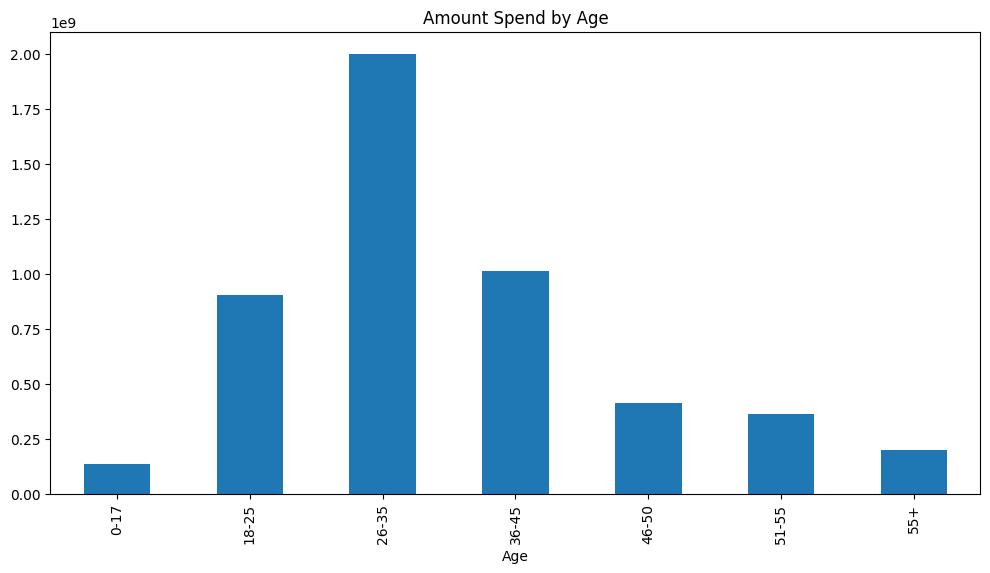

In [136]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar' , figsize = (12,6) , title = 'Amount Spend by Age')

<Axes: ylabel='Purchase'>

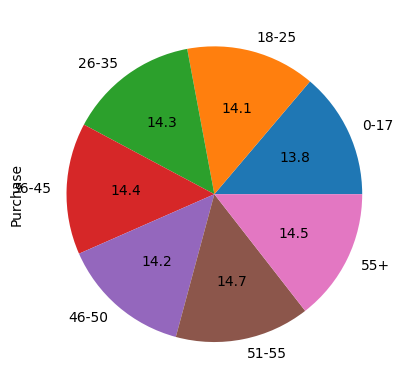

In [135]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

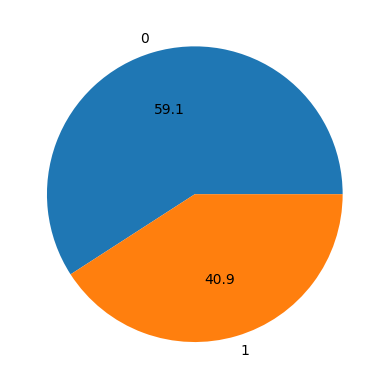

In [148]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')